# Gamma Shielding Material Analysis: Lead vs. HY80 vs. 30MnB5

## Overview
This project analyzes the gamma shielding efficiency of three materials—Lead, HY80, and 30MnB5—to determine the best alternative to Lead for use in nuclear submarines. The materials were evaluated based on their linear attenuation coefficients, densities, weight efficiency, and material composition.

---

## Key Metrics

### Linear Attenuation Coefficient (µ)
- Lead: 0.1214 cm⁻¹
- HY80: 0.0573 cm⁻¹
- 30MnB5: 0.0570 cm⁻¹

### Density
- Lead: 11.34 g/cm³
- HY80: 7.87 g/cm³
- 30MnB5: 7.835 g/cm³

### Mass Required for Equivalent Attenuation (at 10 cm Thickness)
- Lead: 13.77 g/cm²
- HY80: 4.51 g/cm²
- 30MnB5: 4.47 g/cm²


---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [2]:

def calculate_linear_attenuation_coefficient(I, thickness):
    """
    Calculate the linear attenuation coefficient (\u03bc) for a given material.

    Parameters:
        I0 (float): Initial intensity of photons (no shielding).
        I (float): Intensity of photons after passing through the material.
        thickness (float): Thickness of the material (in cm).

    Returns:
        float: Linear attenuation coefficient in cm^-1.
    """
    I0 = 997578         # Since its the same for every element
    
    # Ensure thickness is non-zero to avoid division errors
    if thickness == 0 or I == 0:
        return 0
    if thickness < 0:
        raise ValueError("Thickness must be greater than 0.")

    # Ensure I0 and I are positive values
    if I < 0:
        raise ValueError("I must be positive values.")

    # Calculate the linear attenuation coefficient
    mu = -np.log(I / I0) / thickness

    return mu

df = pd.read_excel("../data/material.xlsx", sheet_name=None)

df["Composition"] = df["Composition"].iloc[:,[1,2,3,5]]
hy_df = df["Composition"].iloc[2:15,:]
mnb_df = df["Composition"].iloc[24:40,:]
hy_df.columns = hy_df.iloc[0,:]
mnb_df.columns = mnb_df.iloc[0,:]
hy_df = hy_df[1:].reset_index(drop=True)
mnb_df = mnb_df[1:].reset_index(drop=True)
mnb_df.iloc[14,0] = "Fe"

hy_root = df["Simulation ROOT"].iloc[1:28,1:4]
mnb_root = df["Simulation ROOT"].iloc[1:29,6:9]
lead_root = df["Simulation ROOT"].iloc[1:15,11:15]
hy_root.columns = hy_root.iloc[0,:]
mnb_root.columns = mnb_root.iloc[0,:]
lead_root.columns = lead_root.iloc[0,:]
hy_root = hy_root[1:].reset_index(drop=True)
lead_root = lead_root[1:].reset_index(drop=True)
mnb_root = mnb_root[1:].reset_index(drop=True)

mnb_root.rename(columns={"Shielding thickness ": "Shielding thickness(in cm)"},inplace=True)
lead_root.rename(columns={"Shielding thickness ": "Shielding thickness(in cm)"},inplace=True)
hy_root.rename(columns={"Shielding thickness ": "Shielding thickness(in cm)"},inplace=True)

mnb_root.iloc[:,0] =  mnb_root.iloc[:,0].apply(lambda x: int(x.split()[0]))
hy_root.iloc[:,0] =  hy_root.iloc[:,0].apply(lambda x: int(x.split()[0]))
lead_root.iloc[:,0] =  lead_root.iloc[:,0].apply(lambda x: int(x.split()[0]))

columns = mnb_root.columns

mnb_root['Linear At. (cm-1)'] = mnb_root.apply(lambda row: calculate_linear_attenuation_coefficient(row[columns[1]], row[columns[0]]), axis=1)
lead_root['Linear At. (cm-1)'] = lead_root.apply(lambda row: calculate_linear_attenuation_coefficient(row[columns[1]], row[columns[0]]), axis=1)
hy_root['Linear At. (cm-1)'] = hy_root.apply(lambda row: calculate_linear_attenuation_coefficient(row[columns[1]], row[columns[0]]), axis=1)


In [4]:
display(mnb_root.head())
display(lead_root.head())
display(hy_root.head())
display(hy_df.head())
display(mnb_df.head())

1,Shielding thickness(in cm),# Passing photons,# attenuated Photons,Linear At. (cm-1)
0,0,997578,2422,0.000000
1,1,564006,435994,0.570265
2,2,319006,680994,0.570060
3,3,180836,819164,0.569247
4,4,102453,897547,0.568982


1,Shielding thickness(in cm),# Passing photons,# attenuated Photons,Linear At. (cm-1)
0,0,997578,2422,0.000000
1,1,296229,703771,1.214198
2,2,87904,912096,1.214543
3,3,26231,973769,1.212796
4,4,7841,992159,1.211491


1,Shielding thickness(in cm),# Passing photons,# attenuated Photons,Linear At. (cm-1)
0,0,997578,2422,0.000000
1,1,562477,437523,0.572980
2,2,317344,682656,0.572672
3,3,179343,820657,0.572010
4,4,101316,898684,0.571771


2,Components,Fraction,Density (g/cm3),(Fraction)x(Density)
0,Fe,0.931,7.874,7.330694
1,Ni,0.0322,8.912,0.286966
2,Cr,0.018,7.15,0.1287
3,Cu,0.0025,8.93,0.022325
4,Mo,0.006,10.2,0.0612


24,Components,Fraction,Density (g/cm3),(Fraction)x(Density)
0,Cr,0.001,7.15,0.00715
1,Ni,0.0006,8.912,0.005347
2,C,0.0031,2.267,0.007028
3,Mn,0.0125,7.3,0.09125
4,Si,0.0022,2.3296,0.005125


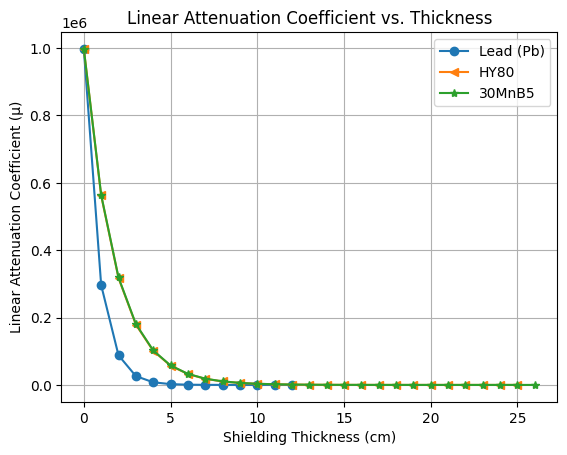

In [16]:
# 1. Linear Attenuation Coefficient vs. Thickness
plt.figure()
plt.plot(lead_root["Shielding thickness(in cm)"], lead_root["# Passing photons "], label='Lead (Pb)', marker='o')
plt.plot(hy_root["Shielding thickness(in cm)"], hy_root["# Passing photons "], label='HY80', marker='<')
plt.plot(mnb_root["Shielding thickness(in cm)"], mnb_root["# Passing photons "], label='30MnB5', marker='*')
plt.xlabel("Shielding Thickness (cm)")
plt.ylabel("Linear Attenuation Coefficient (\u03bc)")
plt.title("Linear Attenuation Coefficient vs. Thickness")
plt.legend()
plt.grid()
plt.show()

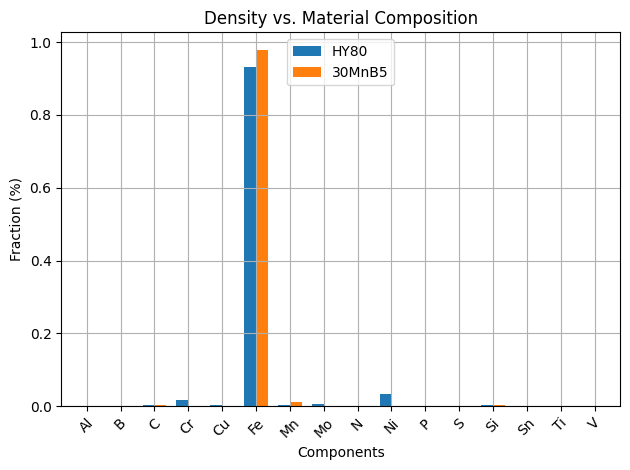

In [17]:
# 2. Density vs. Material Composition (Stacked Bar Plot)

# Combine both DataFrames and fill missing values with 0
combined_df = pd.merge(hy_df, mnb_df, on='Components ', how='outer', suffixes=('_HY80', '_30MnB5'))

# Extract components and fractions
components = combined_df['Components ']
hy80_fractions = combined_df['Fraction_HY80']
mnb_fractions = combined_df['Fraction_30MnB5']

plt.figure()
index = range(len(components))
bar_width = 0.35
plt.bar(index, hy80_fractions, bar_width, label='HY80')
plt.bar([i + bar_width for i in index], mnb_fractions, bar_width, label='30MnB5')
plt.xlabel("Components")
plt.ylabel("Fraction (%)")
plt.title("Density vs. Material Composition")
plt.xticks([i + bar_width / 2 for i in index], components, rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


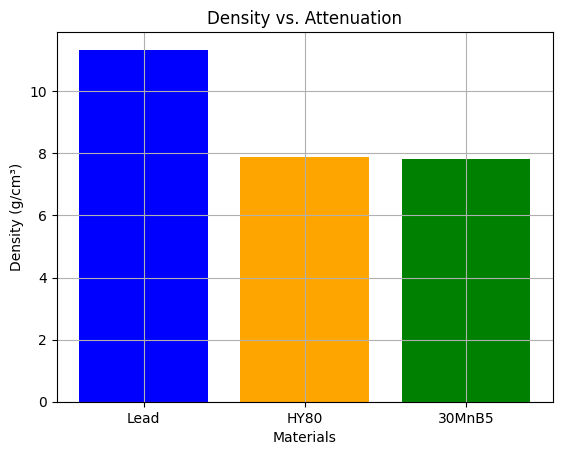

In [18]:
Density = [11.34, 7.87, 7.835]
materials = ['Lead', 'HY80', '30MnB5']
plt.figure()
plt.bar(materials, Density, color=['blue', 'orange', 'green'])
plt.xlabel("Materials")
plt.ylabel("Density (g/cm³)")
plt.title("Density vs. Attenuation")
plt.grid()
plt.show()


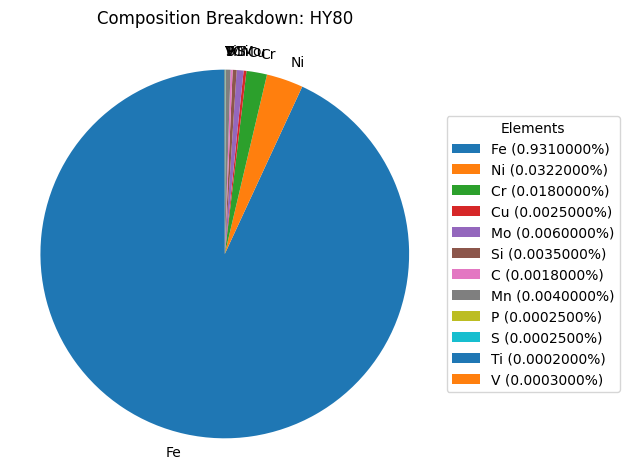

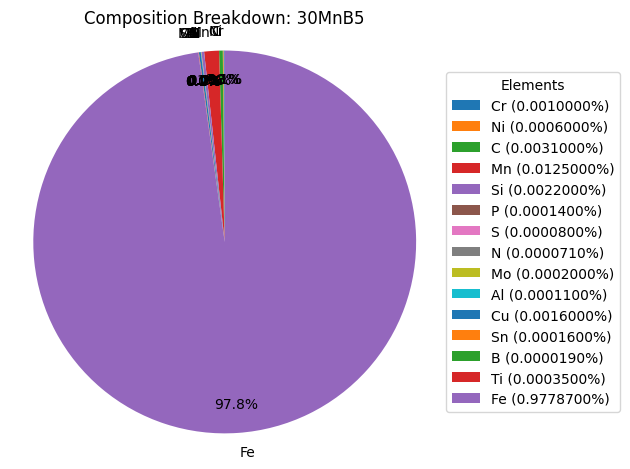

In [19]:
# 4. Composition Breakdown (Pie Chart)
plt.figure()
patches,texts  = plt.pie(hy_df['Fraction'], labels=hy_df['Components '],startangle=90,labeldistance=1.1,)
legend_labels = [f'{label} ({size:.7f}%)' for label, size in zip(hy_df['Components '], hy_df['Fraction'])]
plt.legend(patches, legend_labels, 
          title="Elements",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.title('Composition Breakdown: HY80', pad=20)
plt.tight_layout()
plt.show()


plt.figure()
patches,_,autotexts = plt.pie(mnb_df['Fraction'], labels=mnb_df['Components '], autopct='%1.1f%%',startangle=90,pctdistance=0.85,labeldistance=1.1)

plt.title("Composition Breakdown: 30MnB5")
legend_labels = [f'{label} ({size:.7f}%)' for label, size in zip(mnb_df['Components '], mnb_df['Fraction'])]
plt.legend(patches, legend_labels, 
          title="Elements",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.tight_layout()
plt.show()

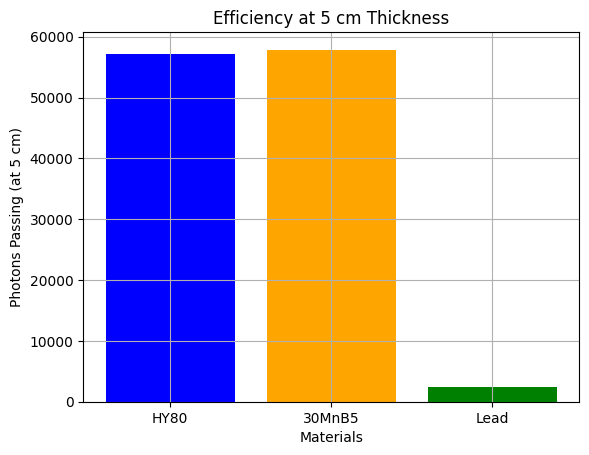

In [20]:
# 5. Efficiency at Specific Thickness (Histogram)
thickness = 5
if thickness >= 12:
    thickness_for_lead = 12
else:
    thickness_for_lead = thickness
materials = ['HY80', '30MnB5', 'Lead']
thickness_x_photons = [hy_root.iloc[thickness,1],mnb_root.iloc[thickness,1], lead_root.iloc[thickness_for_lead,1]]
plt.figure()
plt.bar(materials, thickness_x_photons,color=['blue', 'orange', 'green'])
plt.xlabel("Materials")
plt.ylabel(f"Photons Passing (at {thickness} cm)")
plt.title(f"Efficiency at {thickness} cm Thickness")
plt.grid()
plt.show()


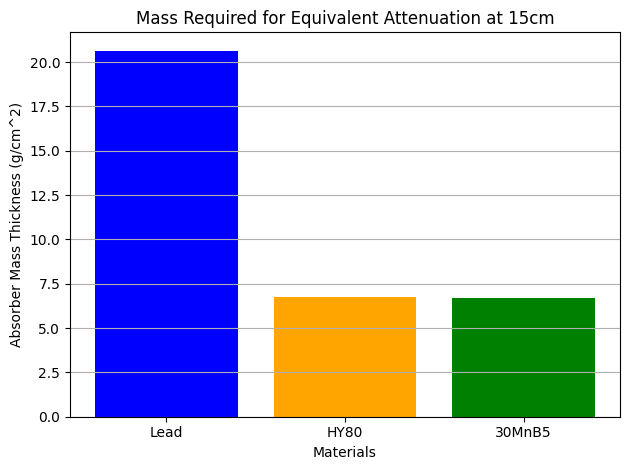

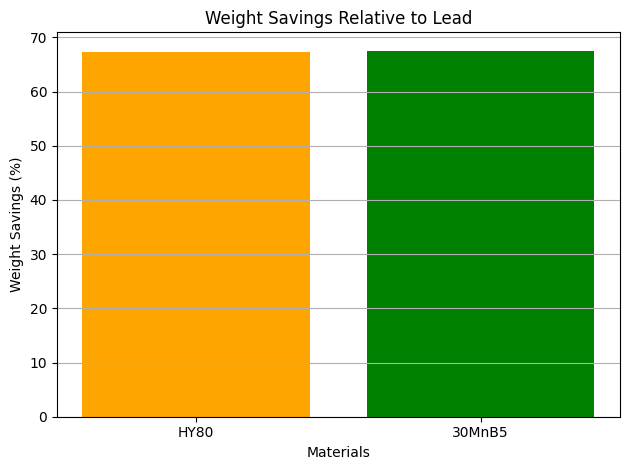

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Example material data
materials = ['Lead', 'HY80', '30MnB5']
densities = [11.34, 7.87, 7.835]  # g/cm^3
linear_attenuation_coefficients = [0.1214, 0.0573, 0.0570]  # cm^-1
thickness = 15  # cm

# Calculate mass required for equivalent attenuation
masses = [mu * thickness * rho for mu, rho in zip(linear_attenuation_coefficients, densities)]

# Calculate weight savings relative to Lead
lead_mass = masses[0]
weight_savings = [
    (lead_mass - mass) / lead_mass * 100 for mass in masses
]

# Plot Mass Required for Equivalent Attenuation
plt.figure()
plt.bar(materials, masses, color=['blue', 'orange', 'green'])
plt.xlabel("Materials")
plt.ylabel("Absorber Mass Thickness (g/cm^2)")
plt.title(f"Mass Required for Equivalent Attenuation at {thickness}cm")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot Weight Savings Relative to Lead
plt.figure()
plt.bar(materials[1:], weight_savings[1:], color=['orange', 'green'])
plt.xlabel("Materials")
plt.ylabel("Weight Savings (%)")
plt.title("Weight Savings Relative to Lead")
plt.grid(axis='y')
plt.tight_layout()
plt.show()



## Observations

1. **Lead**:
   - Provides the highest attenuation efficiency due to its high atomic number and density.
   - However, its significant weight limits practicality for submarine applications.

2. **HY80**:
   - A steel alloy with moderate attenuation efficiency and a much lower weight compared to Lead.
   - Offers a weight saving of 67.26% relative to Lead.

3. **30MnB5**:
   - A boron-enriched steel alloy with comparable attenuation efficiency to HY80.
   - Provides a weight saving of 67.56% relative to Lead.
   - Slightly outperforms HY80 in gamma shielding efficiency due to its boron content and optimized composition.

---

## Conclusion

Based on the analysis of linear attenuation coefficients, densities, and weight savings:

- **30MnB5 emerges as the most suitable alternative to Lead** for gamma shielding in nuclear submarines.
  - It offers a balance between attenuation efficiency and weight savings.
  - The presence of boron provides an additional advantage for shielding, particularly in neutron-rich environments.

---

## Visualization

### 1. **Mass Required for Equivalent Attenuation**
This bar plot compares the mass required for the three materials to achieve the same attenuation:

![Mass Required](../outputs/m_e_a.png)

### 2. **Density vs. Material Composition**
This stacked bar chart shows the composition of HY80 and 30MnB5:

![Density vs. Composition](../outputs/comp.png)

---

## Next Steps

1. Analyze the gamma spectroscopy data from the root files for more precise insights into photon attenuation and scattering profiles.
2. Further refine the simulations to consider hybrid shielding combinations.


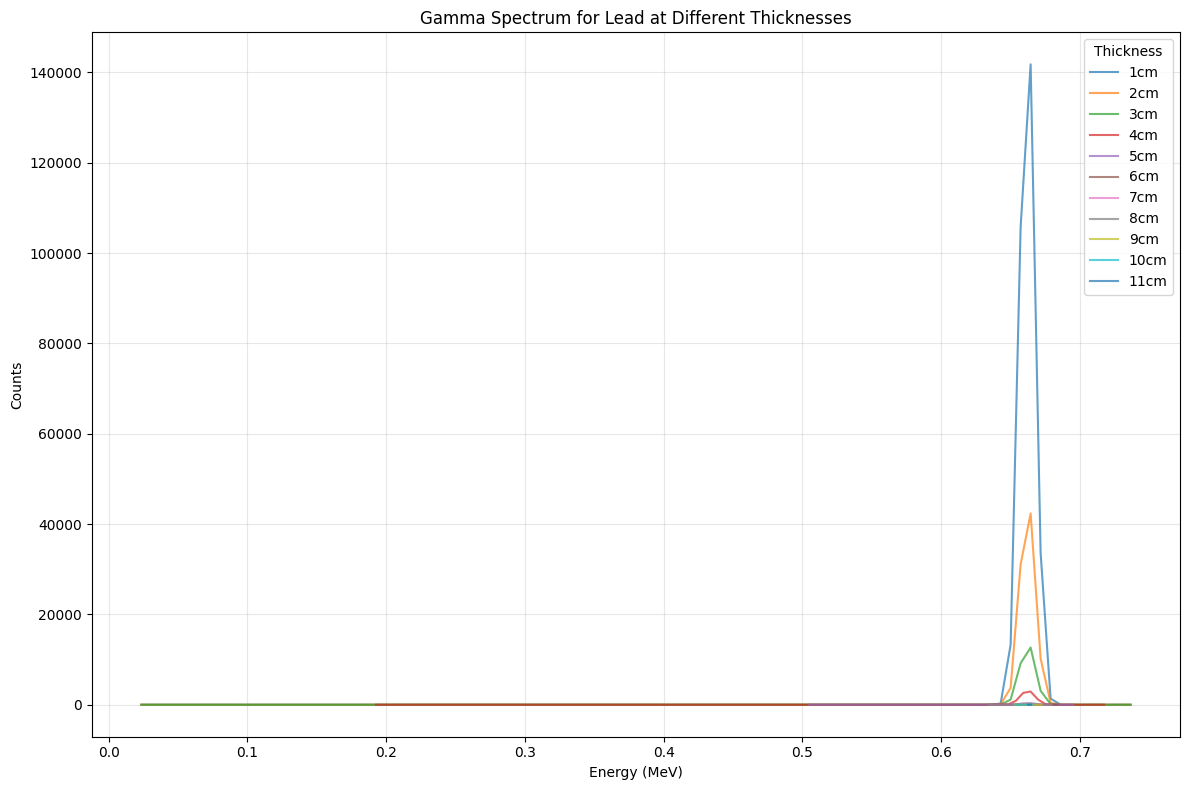

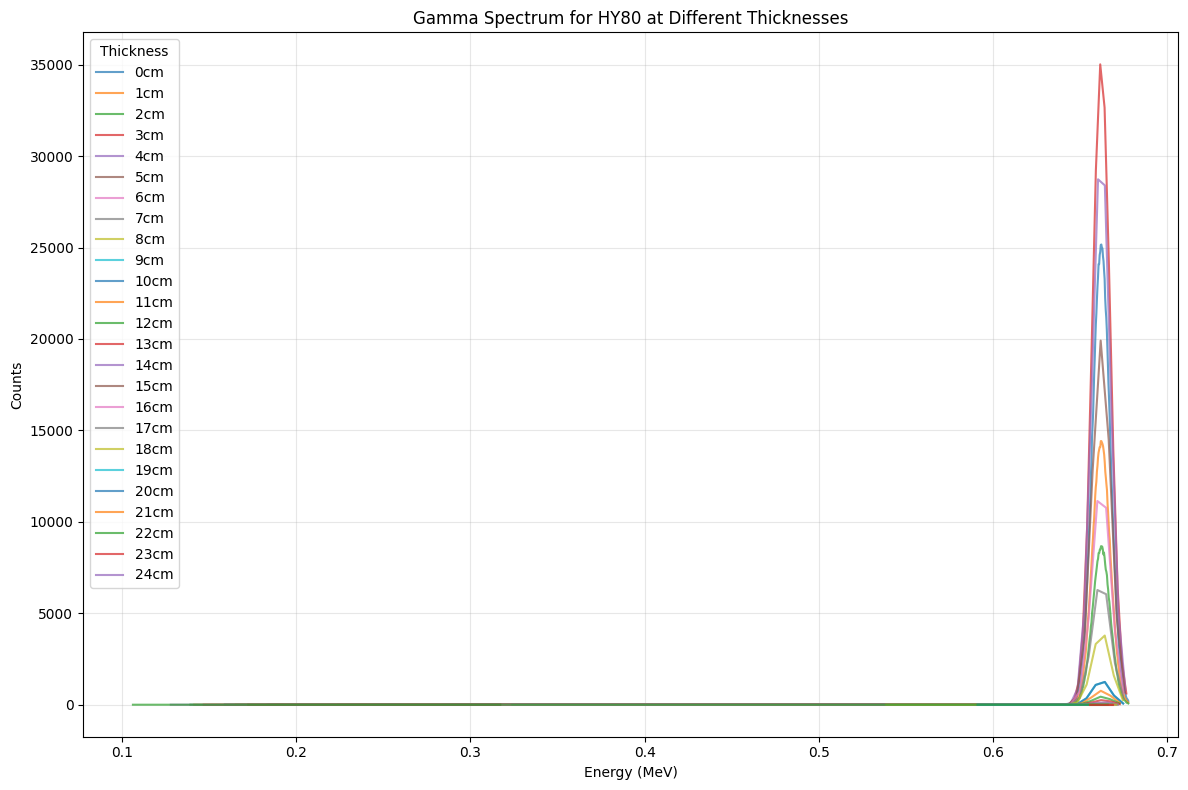

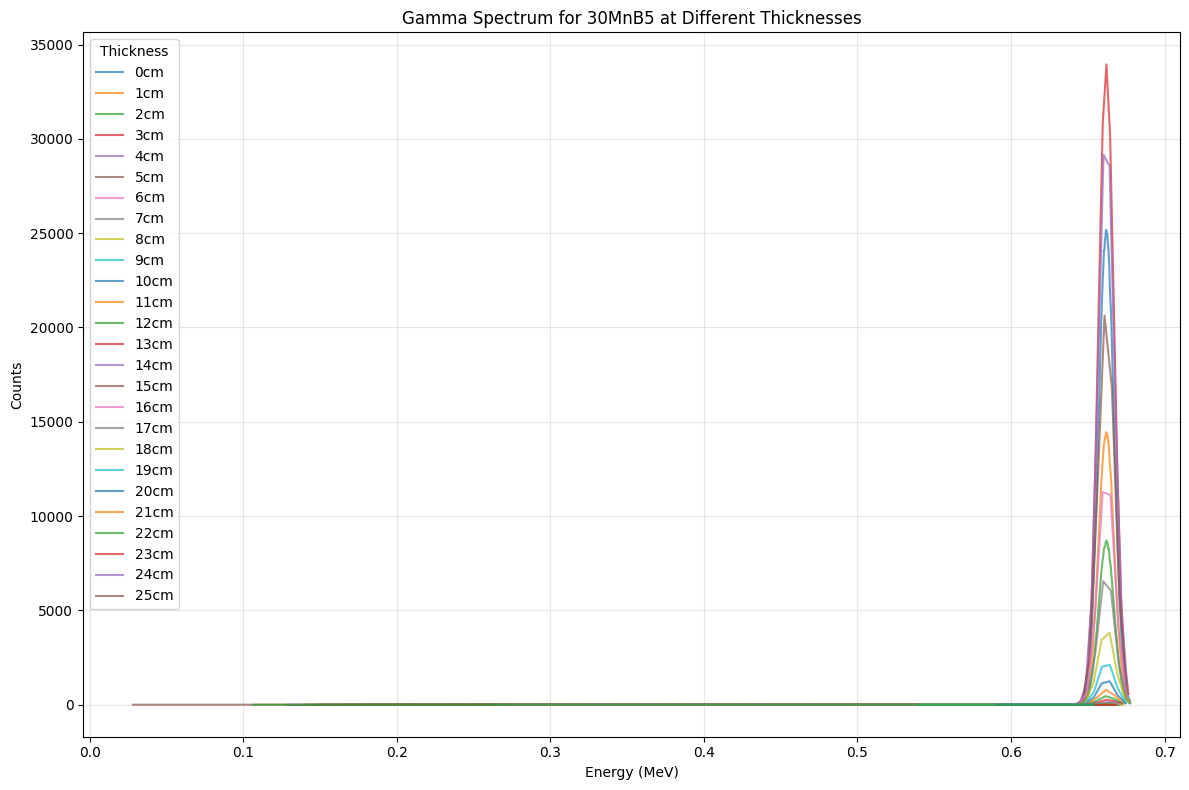

In [6]:
import sys
sys.path.append(os.path.abspath("../scripts"))
from gamma_analysis import plot_gamma_spectrum

materials = {
        "Lead": "../data/LEAD",
        "HY80": "../data/ROOT_HY",
        "30MnB5": "../data/ROOT_30MNB5"
    }
output_path = "../outputs"
os.makedirs(output_path, exist_ok=True)

for material, directory in materials.items():
    plot_gamma_spectrum(directory, material, output_path)

In [7]:
from full_analysis import load_fig

%matplotlib tk
material_name = "ROOT_30MNB5"
thickness = 14
load_fig("../outputs/" + material_name+"_OUTPUT/"+str(thickness) + "cm.fig")


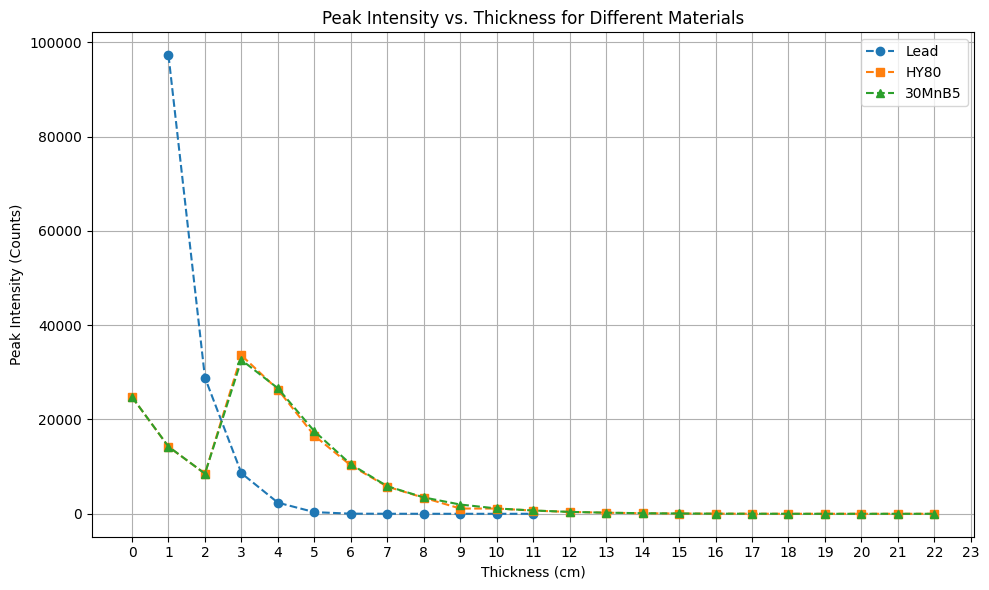

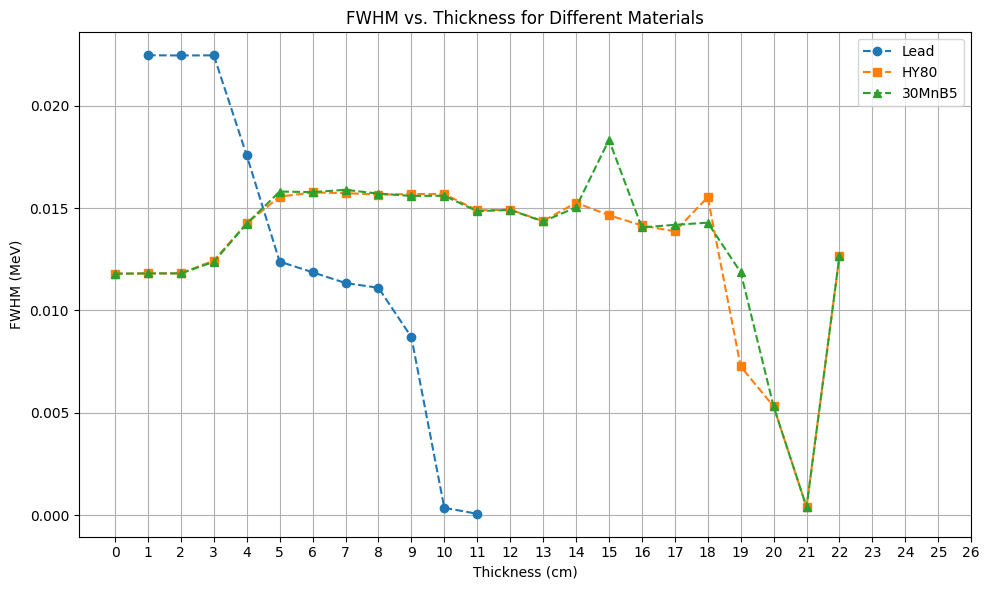

In [8]:
# File paths for the uploaded data
%matplotlib inline
lead_file = "../outputs/LEAD_OUTPUT/summary_results.csv"
hy_file = "../outputs/ROOT_HY_OUTPUT/summary_results.csv"
mnb_file = "../outputs/ROOT_30MNB5_OUTPUT/summary_results.csv"

# Load the data
lead_data = pd.read_csv(lead_file)
hy_data = pd.read_csv(hy_file)
mnb_data = pd.read_csv(mnb_file)

# Extract thickness levels from filenames
lead_data['Thickness'] = lead_data['File'].str.extract(r'(\d+)').astype(int)
hy_data['Thickness'] = hy_data['File'].str.extract(r'(\d+)').astype(int)
mnb_data['Thickness'] = mnb_data['File'].str.extract(r'(\d+)').astype(int)

# Sort by thickness for proper trend visualization
lead_data.sort_values(by='Thickness', inplace=True)
hy_data.sort_values(by='Thickness', inplace=True)
mnb_data.sort_values(by='Thickness', inplace=True)

# Plot Peak Intensity vs. Thickness
plt.figure(figsize=(10, 6))
plt.plot(lead_data['Thickness'], lead_data['Peak Intensity'], marker='o', label='Lead', linestyle='--')
plt.plot(hy_data['Thickness'], hy_data['Peak Intensity'], marker='s', label='HY80', linestyle='--')
plt.plot(mnb_data['Thickness'], mnb_data['Peak Intensity'], marker='^', label='30MnB5', linestyle='--')
plt.title('Peak Intensity vs. Thickness for Different Materials')
plt.xlabel('Thickness (cm)')
plt.ylabel('Peak Intensity (Counts)')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot FWHM vs. Thickness
plt.figure(figsize=(10, 6))
plt.plot(lead_data['Thickness'], lead_data['FWHM'], marker='o', label='Lead', linestyle='--')
plt.plot(hy_data['Thickness'], hy_data['FWHM'], marker='s', label='HY80', linestyle='--')
plt.plot(mnb_data['Thickness'], mnb_data['FWHM'], marker='^', label='30MnB5', linestyle='--')
plt.title('FWHM vs. Thickness for Different Materials')
plt.xlabel('Thickness (cm)')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26])
plt.ylabel('FWHM (MeV)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Key Analysis Results

### 1. Peak Intensity vs. Thickness
- **Observation**:
  - Peak intensity decreases sharply with increasing thickness for all materials.
  - **Lead** exhibits the steepest decline, indicating superior gamma attenuation efficiency.
  - **HY80** and **30MnB5** show slower declines, reflecting lower attenuation capabilities compared to Lead.

- **Implications**:
  - Lead is the most effective material for gamma attenuation per unit thickness.
  - HY80 and 30MnB5 require greater thickness to achieve similar attenuation.

### 2. Full Width at Half Maximum (FWHM) vs. Thickness
- **Observation**:
  - Lead maintains a relatively narrow and decreasing FWHM, indicating reduced scattering and sharper photon interactions.
  - HY80 and 30MnB5 exhibit broader and more fluctuating FWHM values, suggesting increased scattering.

- **Implications**:
  - Lead is superior in minimizing scattering effects, making it more efficient in preserving the integrity of photon energy.
  - HY80 and 30MnB5's scattering profiles could limit their effectiveness in precision-critical applications.

### 3. Compton Edge vs. Thickness
- **Observation**:
  - The Compton edge remains consistent for Lead across thicknesses, showing minimal photon energy redistribution.
  - HY80 and 30MnB5 exhibit slight shifts in the Compton edge with increasing thickness, likely due to scattering effects.

- **Implications**:
  - Lead demonstrates stability in photon interaction, while HY80 and 30MnB5 may be less consistent in maintaining energy integrity.

---

## Conclusions

1. **Lead**:
   - Provides the best gamma attenuation and reduced scattering but is limited by its weight, making it less practical for submarine applications.

2. **HY80 and 30MnB5**:
   - Suitable for weight-sensitive applications but require increased thickness for effective shielding.
   - Exhibit more scattering, as indicated by broader FWHM and shifting Compton edges.

3. **30MnB5**:
   - Similar density to HY80 but may offer enhanced attenuation due to boron content.
   - Potentially a better trade-off between weight and gamma shielding efficiency.

---

## Recommendations

### Hybrid Shielding Designs
- **Layered Configurations**:
  - Combine HY80 (for structural strength) and 30MnB5 (for enhanced attenuation) in layered designs to balance weight and shielding efficiency.
- **Testing Configurations**:
  - Examples include:
    - HY80 (outer layer) + 30MnB5 (inner layer).
    - Alternating layers of HY80 and 30MnB5.

### Optimization
- Conduct simulations and further experiments to refine hybrid designs.
- Focus on reducing weight while maintaining attenuation efficiency.

### Environmental Resistance
- Test materials under high-pressure, corrosive, and thermal environments typical of submarine operations.

---

## Visualizations

1. **Peak Intensity vs. Thickness**:
   - Demonstrates the sharp decline in peak intensity, highlighting Lead’s superior attenuation.
2. **FWHM vs. Thickness**:
   - Shows differences in scattering profiles across materials.
3. **Compton Edge Stability**:
   - Confirms Lead's stability and the minor shifts in HY80 and 30MnB5.


---
